In [1]:
#! /usr/bin/env python3

import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

### Read in CSV

In [2]:
def readCSV(filepath):
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        points = {
            "nVars":[],
            "k":[],
            "time":[],
            "result":[]
        }
        for problem in reader:
            _, nVars, _, k, _, result, _, time, *_ = problem
            points["nVars"].append(int(nVars))
            points["k"].append(int(k))
            points["result"].append(result)
            points["time"].append(float(time))
    return pd.DataFrame(points)

### Scatter plot

In [3]:
def bestFit(x, y):
    # Partially copied from Stack Overflow:
    # https://stackoverflow.com/questions/49071167/fitting-the-python-plot-with-exponential-function
    def exponential_func(x, a, b, c):
        return a*np.exp2(-b*x)+c
    popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1))
    print(f"Best fit exponential: {popt[0]:.2f} * exp2({-popt[1]:.2f}*x) + {popt[2]:.2f}")

    n = 1000
    x = [x[0] + i/n * (x[-1]-x[0]) for i in range(n)]
    yy = [exponential_func(i, *popt) for i in x]
    return x, yy


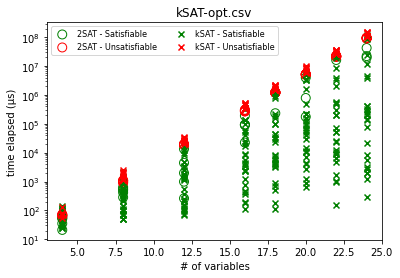

In [17]:
filepath = "kSAT-opt.csv"
df = readCSV(filepath)

ds2 = df[(df.k==2) & (df.result=="S")]
du2 = df[(df.k==2) & (df.result=="U")]
dsk = df[(df.k!=2) & (df.result=="S")]
duk = df[(df.k!=2) & (df.result=="U")]

s2 = plt.scatter(ds2.nVars, ds2.time, marker='o', s=80, facecolors='none', edgecolors="g")
u2 = plt.scatter(du2.nVars, du2.time, marker='o', s=80, facecolors='none', edgecolors="r")
sk = plt.scatter(dsk.nVars, dsk.time, marker='x', color="g")
uk = plt.scatter(duk.nVars, duk.time, marker='x', color="r")

# asthetic
plt.title(f"{filepath}")
plt.xlabel("# of variables")
plt.ylabel("time elapsed (μs)")

plt.legend((s2,u2,sk,uk),
           ('2SAT - Satisfiable', '2SAT - Unsatisfiable', 'kSAT - Satisfiable', 'kSAT - Unsatisfiable'),
           scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=8)


# best fit line
# x = list(df.nVars.unique())
# y = [max(df[df.nVars==xi].time) for xi in x]

# x, yy = bestFit(x, y)
# plt.plot(x, yy)

plt.yscale("log")

plt.show()
